# MODEL DEPLOYMENT

# The goal of the project is to analyze a dataset containing information about players' on FIFA 19 and use this information to create a model that predicts players' ratings.

## ETL & Data Cleansing

In [1]:
## Data Extraction
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rAj8peypq7Z3D-2zWPM1emDkvkOabqpuveC4I18-vzmv',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='coursera-donotdelete-pr-ghrric690wma3r',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190704225330-0001
KERNEL_ID = 6edbc713-13cc-45f2-a81b-f78c53cf108e


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
# Data description
df_data_1.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [3]:
## The correlation coefficient of the entire datasets was calculated
df_data_1.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


In [4]:
df_data_1.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
## All the necessary data was included in a new dataframe
df_fifa = df_data_1[['Age', 'Overall', 'Potential', 'Value', 'Work Rate', 'Jersey Number', 'Release Clause']]

In [6]:
df_fifa.head()

,Age,Overall,Potential,Value,Work Rate,Jersey Number,Release Clause
0,31,94,94,€110.5M,Medium/ Medium,10.0,€226.5M
1,33,94,94,€77M,High/ Low,7.0,€127.1M
2,26,92,93,€118.5M,High/ Medium,10.0,€228.1M
3,27,91,93,€72M,Medium/ Medium,1.0,€138.6M
4,27,91,92,€102M,High/ High,7.0,€196.4M


In [7]:
df_fifa.corr()

,Age,Overall,Potential,Jersey Number
Age,1.000000,0.452350,-0.253312,-0.241156
Overall,0.452350,1.000000,0.660939,-0.218931
Potential,-0.253312,0.660939,1.000000,-0.010474
Jersey Number,-0.241156,-0.218931,-0.010474,1.000000


In [8]:
df_fifa.drop('Work Rate', axis = 1, inplace = True)

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
df_fifa.head()

,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,31,94,94,€110.5M,10.0,€226.5M
1,33,94,94,€77M,7.0,€127.1M
2,26,92,93,€118.5M,10.0,€228.1M
3,27,91,93,€72M,1.0,€138.6M
4,27,91,92,€102M,7.0,€196.4M


In [10]:
df_fifa['Value'] = [x[1:-1] for x in df_fifa['Value']]

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
df_fifa.head()

,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,31,94,94,110.5,10.0,€226.5M
1,33,94,94,77,7.0,€127.1M
2,26,92,93,118.5,10.0,€228.1M
3,27,91,93,72,1.0,€138.6M
4,27,91,92,102,7.0,€196.4M


In [12]:
df_fifa['Release Clause'] = df_fifa['Release Clause'].map(lambda x: str(x)[1:-1])

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df_fifa = df_fifa.convert_objects(convert_numeric = True)
df_fifa.corr()

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,Age,Overall,Potential,Value,Jersey Number,Release Clause
Age,1.000000,0.452350,-0.253312,-0.044111,-0.241156,-0.041166
Overall,0.452350,1.000000,0.660939,-0.234541,-0.218931,-0.392288
Potential,-0.253312,0.660939,1.000000,-0.236335,-0.010474,-0.385456
Value,-0.044111,-0.234541,-0.236335,1.000000,0.009908,0.280187
Jersey Number,-0.241156,-0.218931,-0.010474,0.009908,1.000000,0.049994
Release Clause,-0.041166,-0.392288,-0.385456,0.280187,0.049994,1.000000


In [14]:
df_fifa = df_fifa.dropna().reset_index(drop = True)
df_fifa.describe()

,Age,Overall,Potential,Value,Jersey Number,Release Clause
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,66.162771,71.140900,268.732620,19.657213,228.201274
std,4.716588,7.008236,6.151409,287.580369,16.054811,299.251866
min,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,5.000000,8.000000,2.500000
50%,25.000000,66.000000,71.000000,170.000000,17.000000,19.800000
75%,29.000000,71.000000,75.000000,475.000000,26.000000,431.000000
max,45.000000,94.000000,95.000000,975.000000,99.000000,999.000000


## For some exploration

In [15]:
## Machine Learning packages were imported for exploring the data set 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<BarContainer object of 16643 artists>

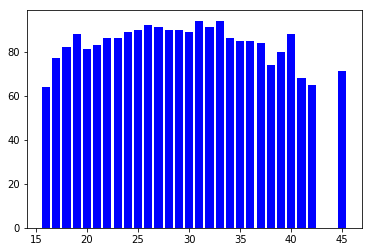

In [16]:
plt.bar(df_fifa["Age"],df_fifa["Overall"],  color='blue')

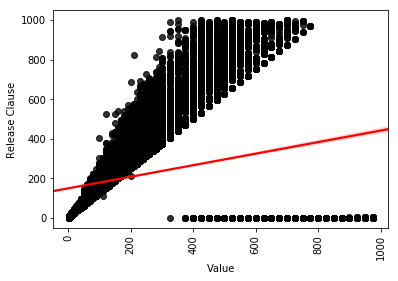

In [17]:
sns.regplot('Value', 'Release Clause', data = df_fifa, marker = 'o', color = 'black', line_kws={'color': 'red'}) 
plt.xticks(rotation = 90)
plt.show()

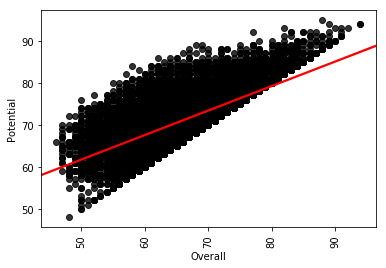

In [18]:
sns.regplot('Overall', 'Potential', data = df_fifa, marker = 'o', color = 'black', line_kws={'color': 'red'}) 
plt.xticks(rotation = 90)
plt.show()

### The previous set of codes was carried out in jupyter labs and a new csv file was created which was added under the assets in watson studio

## Model Definition

## Linear Regression model 

In [19]:
# scikit learn packages were imported for creating a linear regression model
from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()

In [20]:
df_fifa_x = df_fifa[['Age','Value','Potential','Jersey Number','Release Clause']]
df_fifa_y = df_fifa['Overall']

In [21]:
regr.fit(df_fifa_x,df_fifa_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
df_fifa_y_pred = regr.predict(df_fifa_x)

In [23]:
r2 = r2_score(df_fifa_y, df_fifa_y_pred)
r2
## The r-squared score was gotten to be 0.856

0.8558430480875456

## Linear Regression model using Apache SparkML

In [24]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-3ce923ef-7962-40c0-8e40-0a99347c0719',
    'iam_service_endpoint': 'https://iam.bluemix.net/oidc/token',
    'api_key': 'rAj8peypq7Z3D-2zWPM1emDkvkOabqpuveC4I18-vzmv'
}

configuration_name = 'os_e62b6c1bb76c4710b1d1cc5aeab9a929_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_2 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('fifa19_data.csv', 'coursera-donotdelete-pr-ghrric690wma3r'))
df_data_2.take(5)


[Row(_c0='0', Age='31', Overall='94', Potential='94', Value='110.5', Jersey Number='10.0', Release Clause='226.5'),
 Row(_c0='1', Age='33', Overall='94', Potential='94', Value='77.0', Jersey Number='7.0', Release Clause='127.1'),
 Row(_c0='2', Age='26', Overall='92', Potential='93', Value='118.5', Jersey Number='10.0', Release Clause='228.1'),
 Row(_c0='3', Age='27', Overall='91', Potential='93', Value='72.0', Jersey Number='1.0', Release Clause='138.6'),
 Row(_c0='4', Age='27', Overall='91', Potential='92', Value='102.0', Jersey Number='7.0', Release Clause='196.4')]

## Feature Engineering

In [25]:
from pyspark.ml.feature import VectorAssembler

In [26]:
from pyspark.ml.feature import Normalizer

In [27]:
from pyspark.ml.regression import LinearRegression

In [28]:
vectorAssembler = VectorAssembler(inputCols = ['Age','Potential','Value','Jersey Number', 'Release Clause'], outputCol = 'features')


In [29]:
normalizer = Normalizer(inputCol = 'features', outputCol = 'features_norm', p = 1.0)

In [30]:
regression = LinearRegression(labelCol = "Overall", featuresCol = "features", maxIter = 10)
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, normalizer, regression])

In [31]:
df_fifa_2 = df_data_2.select(df_data_2['Age'].cast("float"), df_data_2['Potential'].cast("float"), df_data_2['Value'].cast("float"), df_data_2['Jersey Number'].cast("float"),df_data_2['Release Clause'].cast("float"),df_data_2['Overall'].cast("float"))


In [32]:
model = pipeline.fit(df_fifa_2)

In [33]:
prediction = model.transform(df_fifa_2)
prediction.show()

+----+---------+-----+-------------+--------------+-------+--------------------+--------------------+-----------------+
| Age|Potential|Value|Jersey Number|Release Clause|Overall|            features|       features_norm|       prediction|
+----+---------+-----+-------------+--------------+-------+--------------------+--------------------+-----------------+
|31.0|     94.0|110.5|         10.0|         226.5|   94.0|[31.0,94.0,110.5,...|[0.06567796610169...| 92.4512961453318|
|33.0|     94.0| 77.0|          7.0|         127.1|   94.0|[33.0,94.0,77.0,7...|[0.09760425953544...|94.54923765260584|
|26.0|     93.0|118.5|         10.0|         228.1|   92.0|[26.0,93.0,118.5,...|[0.05466778735562...|86.82625408365548|
|27.0|     93.0| 72.0|          1.0|         138.6|   91.0|[27.0,93.0,72.0,1...|[0.08142340019008...|88.11310026236045|
|27.0|     92.0|102.0|          7.0|         196.4|   91.0|[27.0,92.0,102.0,...|[0.06361922805914...|86.98576064587671|
|27.0|     91.0| 93.0|         10.0|    

In [34]:
from pyspark.ml.evaluation import RegressionEvaluator

In [35]:
regEval = RegressionEvaluator().setMetricName("r2") .setPredictionCol("prediction").setLabelCol("Overall")
regEval.evaluate(prediction) 
## The r-squared score was gotten to be 0.856 when apache spark pipeline was used

0.8558430480870848

## Model Training

In [38]:
train, test = df_fifa_2.randomSplit([0.9, 0.1], seed = 1)

In [39]:
model = pipeline.fit(train)

In [40]:
prediction = model.transform(test)
prediction.show()

+----+---------+-----+-------------+--------------+-------+--------------------+--------------------+------------------+
| Age|Potential|Value|Jersey Number|Release Clause|Overall|            features|       features_norm|        prediction|
+----+---------+-----+-------------+--------------+-------+--------------------+--------------------+------------------+
|16.0|     67.0| 60.0|         16.0|         131.0|   49.0|[16.0,67.0,60.0,1...|[0.05517241379310...| 53.92014449146242|
|16.0|     73.0|180.0|         14.0|         338.0|   56.0|[16.0,73.0,180.0,...|[0.02576489533011...| 59.08177492821754|
|16.0|     77.0|180.0|         26.0|         441.0|   55.0|[16.0,77.0,180.0,...|[0.02162162162162...| 62.23516655099665|
|16.0|     80.0|190.0|         37.0|         523.0|   55.0|[16.0,80.0,190.0,...|[0.01891252955082...| 64.54495871252115|
|16.0|     81.0|725.0|         31.0|           1.6|   63.0|[16.0,81.0,725.0,...|[0.01872220922016...| 66.37687942869125|
|17.0|     63.0| 60.0|         3

## Model Evaluation

In [41]:
from pyspark.ml.evaluation import RegressionEvaluator
regEval = RegressionEvaluator().setMetricName("r2") .setPredictionCol("prediction").setLabelCol("Overall")
regEval.evaluate(prediction)

## Based on the model evaluation, the r-squared score was 0.859 which is a a very slight improvement from the regular model

0.8595799732927749